The aim of this project is to identify the fraud transactions of credit card suing the available dataset.But the problem is almost 99% of the transactions are genuine and only 1% are fruad so when we try to build model with this data is gives almost biased results,technically such kind of dataset is called imbalanced data so we use various techniques like 
1)Random UnderSampling
2)SMOTE
3)Combined class method to balance the data and then a model to make predictions and calculating the f1-score .

Import Necessary packages to load,manipulate data and to build a model to detect number of fraud transactions for credit card transactions.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,roc_auc_score,roc_curve
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Mounting google colab to drive to import the dataset.

In [80]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [81]:
# Reading the dataset using pandas and assigning it the name data.
data=pd.read_csv('gdrive/My Drive/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [83]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [84]:
data.shape

(284807, 31)

In [85]:
data[data.Class==1].shape

(492, 31)

In [86]:
data[data.Class==0].shape

(284315, 31)

In [87]:
print('Number of genuine transactions are {}% of the total transactions'.format(100*284315/284807))
print('Fraud transactions are {} of the total transactions'.format(100*492/284807))

Number of genuine transactions are 99.827251436938% of the total transactions
Fraud transactions are 0.1727485630620034 of the total transactions


Here the Fraud transactions account for only 0.17 % whixh is very less compared to the genuine transactions, so we can conclude that the dataset is imbalanced and we have to balance the before building a classifation model and predict the values.
The dataset can be balanced by using various techniques, they are
1)Random Undersampling
2)Synthetic Minority Over Sampling Technique(SMOTE)
3)Combined approach using k nearest neighbours.

In [0]:
minor=data[data.Class==1]
major=data[data.Class==0]

In [89]:
minor.shape, major.shape

((492, 31), (284315, 31))

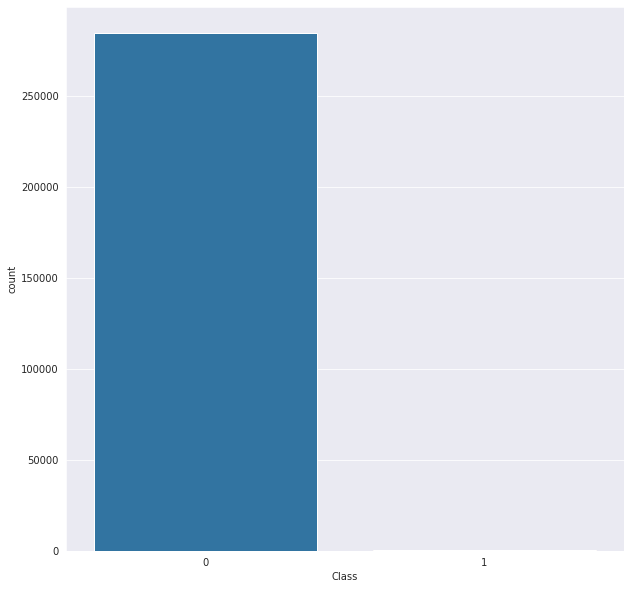

In [90]:
sns.set_style('darkgrid')
sns.countplot('Class',data=data)
plt.rcParams['figure.figsize']=10,10

In [0]:
X=data.drop('Class',axis=1)
y=data['Class']

**1) Random UnderSampling**

In this approach we balanced the data using Random Undersampler and build model using various classifcation tools and ploted the Roc_curve.

In [92]:
from imblearn.under_sampling import RandomUnderSampler
print('Original dataset shape %s'%Counter(y))
rus=RandomUnderSampler(random_state=2)
X_rus,y_rus=rus.fit_resample(X,y)
print('Resampled dataset shape %s'% Counter(y_rus))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [0]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,random_state=42,train_size=0.70)

In [0]:
lr_rus=LogisticRegression().fit(X_train_rus,y_train_rus)
ypred_lr_rus=lr_rus.predict(X_test_rus)

In [95]:
print(classification_report(ypred_lr_rus,y_test_rus))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       156
           1       0.90      0.94      0.92       140

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



The above classification report is for Logistic Regression for Random undersampling with a f1 score of 0.93.

In [0]:
lr_rus_roc=roc_auc_score(ypred_lr_rus,y_test_rus)
fpr, tpr, thresholds = roc_curve(ypred_lr_rus,y_test_rus)

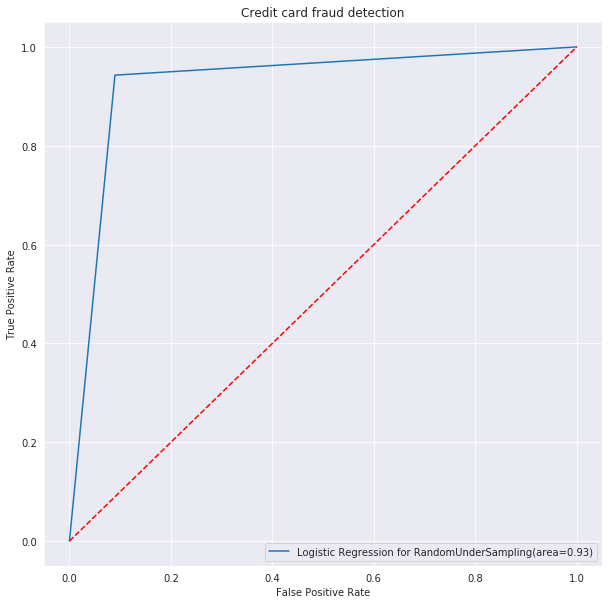

In [97]:
plt.figure()
plt.plot(fpr,tpr,label="Logistic Regression for RandomUnderSampling(area=%0.2f)"%lr_rus_roc)
plt.plot([0,1],[0,1],"r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Credit card fraud detection")
plt.legend(loc="lower right")
plt.show()

The above plot showing the roc_curve for logistic regression for Random UnderSampling.

**Random Forest Classifier**

In [0]:
rf_rus=RandomForestClassifier().fit(X_train_rus,y_train_rus)
ypred_rf_rus=rf_rus.predict(X_test_rus)

In [99]:
print(classification_report(ypred_rf_rus,y_test_rus))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       164
           1       0.90      0.99      0.94       132

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



Now for the same Random Undersampling we build a model suing RandomForestClassifier and the classification report is shown above with a f1 score of 0.95, so we no need some other model to predict the values because RandomForest has the f1-score of 0.95 which is very high.

In [0]:
rf_rus_roc=roc_auc_score(ypred_rf_rus,y_test_rus)
fpr, tpr, thresholds = roc_curve(ypred_rf_rus,y_test_rus)

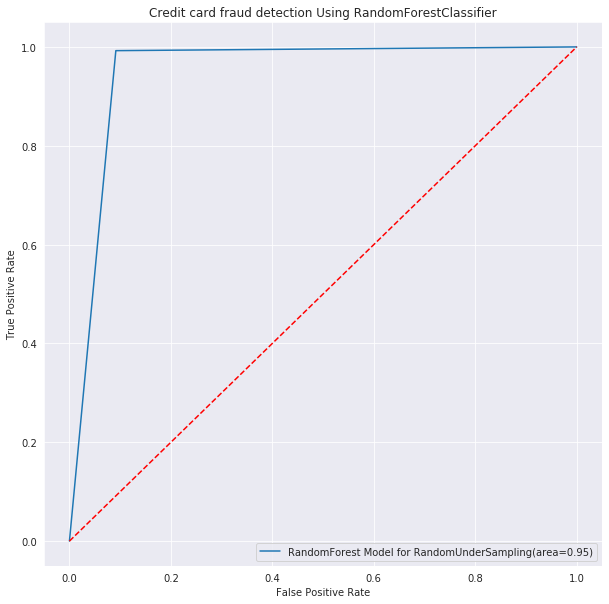

In [101]:
plt.figure()
plt.plot(fpr,tpr,label="RandomForest Model for RandomUnderSampling(area=%0.2f)"%rf_rus_roc)
plt.plot([0,1],[0,1],"r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Credit card fraud detection Using RandomForestClassifier")
plt.legend(loc="lower right")
plt.show()

The above roc_curve is for RandomForestClassifier for RandomUnderSampling with an area of 95% under the curve.

**Synthetic Minority Over Sampling(SMOTE)**

In [102]:
print('Original dataset shape %s'%Counter(y))
sm=SMOTE(random_state=2)
X_res,y_res=sm.fit_resample(X,y)
print('Resampled dataset shape %s'% Counter(y_res))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [0]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,random_state=42,train_size=0.75)

**Logistic Regression**

In [0]:
ls_sm=LogisticRegression().fit(X_train,y_train)
ypred_sm_ls_sm=ls_sm.predict(X_test)

In [105]:
print(classification_report(ypred_sm_ls_sm,y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     72165
           1       0.96      0.98      0.97     69993

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



The above classification report is for SMOTE using Logistic Regression with a F1-score of 0.97.

In [0]:
ls_sm_roc=roc_auc_score(ypred_sm_ls_sm,y_test)
fpr, tpr, thresholds = roc_curve(ypred_sm_ls_sm,y_test)

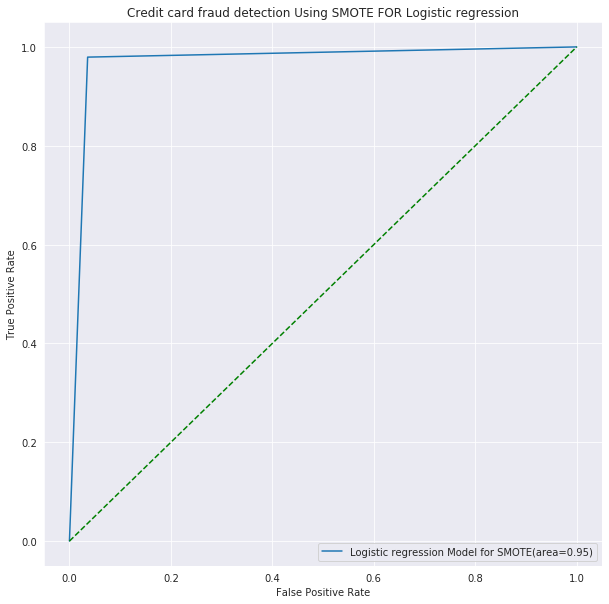

In [107]:
plt.figure()
plt.plot(fpr,tpr,label="Logistic regression Model for SMOTE(area=%0.2f)"%rf_rus_roc)
plt.plot([0,1],[0,1],"g--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Credit card fraud detection Using SMOTE FOR Logistic regression")
plt.legend(loc="lower right")
plt.show()

The above curve is for logistic regression for SMOTE.

**RandomForestClassifier**

In [0]:
rf_sm=RandomForestClassifier().fit(X_train,y_train)
ypre_rf_sm=rf_sm.predict(X_test)

In [109]:
print(classification_report(ypre_rf_sm,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71010
           1       1.00      1.00      1.00     71148

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



The above classification report is for RandomForestClassifier for SMOTE and has a f1-score of 1.

In [0]:
rf_sm_roc=roc_auc_score(ypre_rf_sm,y_test)
fpr, tpr, thresholds = roc_curve(ypre_rf_sm,y_test)

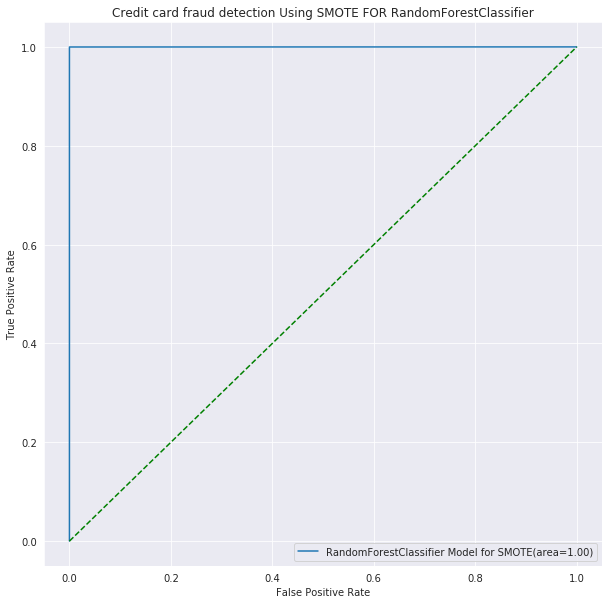

In [111]:
plt.figure()
plt.plot(fpr,tpr,label="RandomForestClassifier Model for SMOTE(area=%0.2f)"%rf_sm_roc)
plt.plot([0,1],[0,1],"g--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Credit card fraud detection Using SMOTE FOR RandomForestClassifier")
plt.legend(loc="lower right")
plt.show()

**SMOTE ENN**

In [112]:
from imblearn.combine import SMOTEENN
print('Original dataset shape %s'%Counter(y))
enn=SMOTEENN(random_state=42)
X_enn,y_enn=enn.fit_resample(X,y)
print('Resampled dataset shape %s'% Counter(y_enn))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({1: 275740, 0: 265395})


In [0]:
X_train_enn,X_test_enn,y_train_enn,y_test_enn=train_test_split(X_enn,y_enn,train_size=0.70,random_state=42)

**Logistic Regression**

In [0]:
lr_enn=LogisticRegression().fit(X_train_enn,y_train_enn)
ypre_lr_enn=lr_enn.predict(X_test_enn)

In [115]:
print(classification_report(ypre_lr_enn,y_test_enn))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     81006
           1       0.97      0.98      0.97     81335

    accuracy                           0.97    162341
   macro avg       0.97      0.97      0.97    162341
weighted avg       0.97      0.97      0.97    162341



Classification report states that the LogisticRegression for combined approach using enn has a f1-score of 0.97.

In [0]:
lr_enn_roc=roc_auc_score(ypre_lr_enn,y_test_enn)
fpr, tpr, thresholds = roc_curve(ypre_lr_enn,y_test_enn)

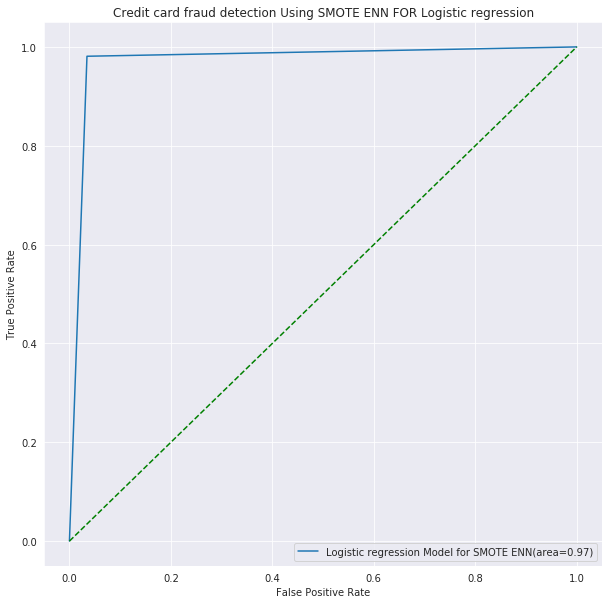

In [117]:
plt.figure()
plt.plot(fpr,tpr,label="Logistic regression Model for SMOTE ENN(area=%0.2f)"%lr_enn_roc)
plt.plot([0,1],[0,1],"g--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Credit card fraud detection Using SMOTE ENN FOR Logistic regression")
plt.legend(loc="lower right")
plt.show()

The roc curve for the logistic regression for smote enn has 97% of its area under the curve.

**RandomForestClassifier**

In [0]:
rf_enn=RandomForestClassifier().fit(X_train_enn,y_train_enn)

In [0]:
ypred_rf_enn=rf_enn.predict(X_test_enn)

In [120]:
print(classification_report(y_test_enn,ypred_rf_enn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79744
           1       1.00      1.00      1.00     82597

    accuracy                           1.00    162341
   macro avg       1.00      1.00      1.00    162341
weighted avg       1.00      1.00      1.00    162341



Classification Table showing the f1 score of 1 for RandomForestClassifier for smote enn.

In [0]:
rf_enn_roc=roc_auc_score(ypred_rf_enn,y_test_enn)
fpr, tpr, thresholds = roc_curve(ypred_rf_enn,y_test_enn)

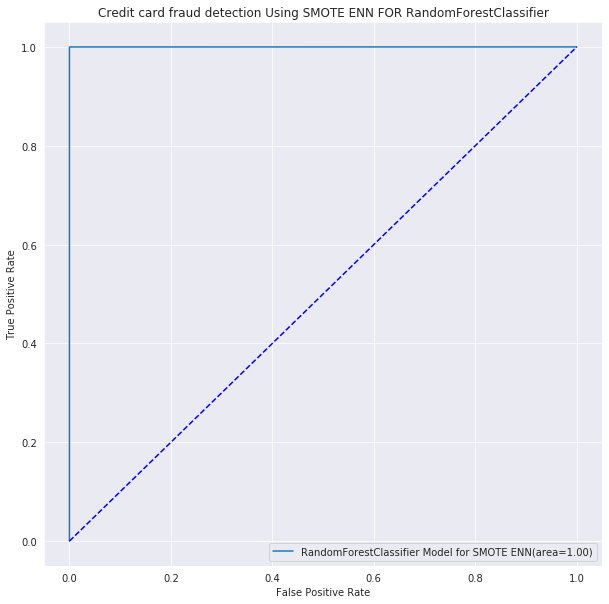

In [122]:
plt.figure()
plt.plot(fpr,tpr,label="RandomForestClassifier Model for SMOTE ENN(area=%0.2f)"%rf_enn_roc)
plt.plot([0,1],[0,1],"b--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Credit card fraud detection Using SMOTE ENN FOR RandomForestClassifier")
plt.legend(loc="lower right")
plt.show()

Above Roc curve has 100 % of its area below the curve.

So finally we can use RandomForestClassifier for SMOTE(Oversampling) or SMOTE ENN(Combined approach) to predict the fraud transactions beacause both of them are having a f1 score of 1 which is highly efficient to predict the fruadulent credit card transactions.